In [3]:
1+1

2

## Model Training


#### 1.1 Import Data and Required Libraries


In [4]:
# Basic Import import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Model import
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor

## import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## remove warnings
import warnings
warnings.filterwarnings("ignore")

#### Import the CSV data

In [5]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Split data into dependent and independent variables

In [6]:
X = df.drop(['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = df['math_score']

In [8]:
print("Categories in gender: ",end=' ')
print(df['gender'].unique())

print("Categories in racee_ethnicity: ",end=' ')
print(df['race_ethnicity'].unique())

print("categories in parental level of education: ",end=' ')
print(df['parental_level_of_education'].unique())

print('Categories in lunch: ',end=' ')
print(df['lunch'].unique())

print('Categories in test preparation course: ',end=' ')
print(df['test_preparation_course'].unique())

Categories in gender:  <StringArray>
['female', 'male']
Length: 2, dtype: str
Categories in racee_ethnicity:  <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
categories in parental level of education:  <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in lunch:  <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in test preparation course:  <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [9]:
## Create column transfer with 3 type of transformers

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

oh_transformer = OneHotEncoder()
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [    
        ("OneHotEncoder",oh_transformer, cat_features),
        ("StandardScalar",num_transformer, num_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
df.shape

(1000, 8)

In [12]:
X.shape

(1000, 19)

In [13]:
## Split data for test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((800, 19), (200, 19))

#### Function to evaluate the model performance

In [14]:
def model_performance(test, pred):
    mse = mean_squared_error(test,pred)
    mae = mean_absolute_error(test,pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,pred)
    return mae, mse, rmse, r2score

In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'K-Nearest Neighbours': KNeighborsRegressor(),
    'Support vector Regressor': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Adaboost Regressor': AdaBoostRegressor(),
    'xgboost': XGBRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make train data predictions
    ytrainpred = model.predict(X_train)
    ytestpred = model.predict(X_test)

    # print train performance
    mae,mse,rmse,rscore = model_performance(y_train,ytrainpred)
    print(list(models.keys())[i]," :")
    model_list.append(list(models.keys())[i])
    print("Training data performance")
    print(f"Mean absolute error: {mae}")
    print(f"Mean squared error: {mse}")
    print(f"Root mean squared error: {rmse}")
    print(f"r2 score: {rscore}")
    print("----------------------------")

    # Print test performance
    tmae, tmse,trmse, trscore = model_performance(y_test,ytestpred)
    print("Test data performance")
    print("Training data performance")
    print(f"Mean absolute error: {tmae}")
    print(f"Mean squared error: {tmse}")
    print(f"Root mean squared error: {trmse}")
    print(f"r2 score: {trscore}")
    print("\n=============================")
    r2_list.append(trscore)



Linear Regression  :
Training data performance
Mean absolute error: 4.266711846071957
Mean squared error: 28.33487038064859
Root mean squared error: 5.323050852720514
r2 score: 0.8743172040139593
----------------------------
Test data performance
Training data performance
Mean absolute error: 4.21476314247485
Mean squared error: 29.095169866715487
Root mean squared error: 5.393993869732843
r2 score: 0.8804332983749565

Ridge  :
Training data performance
Mean absolute error: 4.264987823725981
Mean squared error: 28.33778823308244
Root mean squared error: 5.323324922741654
r2 score: 0.8743042615212909
----------------------------
Test data performance
Training data performance
Mean absolute error: 4.211100688014261
Mean squared error: 29.056272192348324
Root mean squared error: 5.390387016935642
r2 score: 0.8805931485028737

Lasso  :
Training data performance
Mean absolute error: 5.206302661246528
Mean squared error: 43.47840400585581
Root mean squared error: 6.593815587795568
r2 score: 

In [16]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','r2_score'])

,Model,r2_score
0,Linear Regression,0.880433
1,Ridge,0.880593
2,Lasso,0.825320
3,K-Nearest Neighbours,0.783813
4,Support vector Regressor,0.728600
5,Decision Tree,0.738389
6,Random Forest Regressor,0.850057
7,Adaboost Regressor,0.857984
8,xgboost,0.827797


##### Linear Regression model is performing better compared all other models

In [20]:
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"Accuracy of the model: {score*100:.2f}")

Accuracy of the model: 88.04


### Plot y_pred and y_test

Text(0, 0.5, 'Actual')

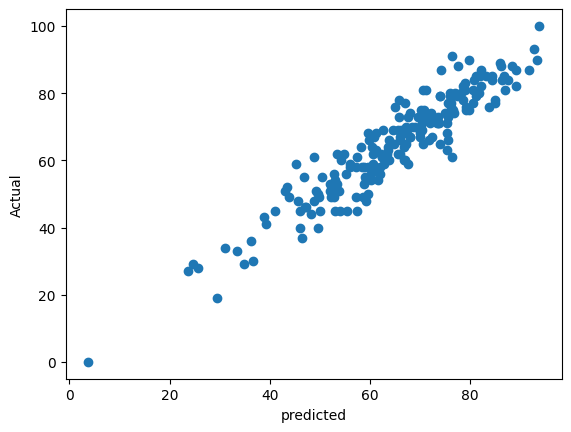

In [21]:
plt.scatter(y_pred,y_test)
plt.xlabel("predicted")
plt.ylabel('Actual')

<Axes: xlabel='math_score'>

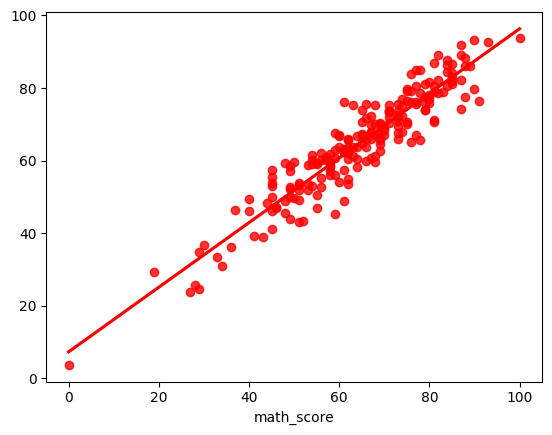

In [22]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

### Calculate residuals

In [23]:
pred_df = pd.DataFrame({'Actual value':y_test,
                        'Predicted value':y_pred,
                        'Residual':y_test - y_pred})
pred_df

,Actual value,Predicted value,Residual
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
